<a href="https://colab.research.google.com/github/fedhere/DSPS/blob/master/HW5/BuildingsEnergyOwners.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# -- link google drive
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd "/content/drive/My Drive/dsps"

/content/drive/My Drive/dsps


In [0]:
# -- useful imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import scipy as sp
from scipy import stats

# data retrival
### LL84
get the Local Law 84 (ll84) data from the URL: https://data.cityofnewyork.us/api/views/8u86-bviy/rows.csv and read it in with Pandas



In [0]:
!wget https://data.cityofnewyork.us/api/views/8u86-bviy/rows.csv

--2019-09-27 02:24:37--  https://data.cityofnewyork.us/api/views/8u86-bviy/rows.csv
Resolving data.cityofnewyork.us (data.cityofnewyork.us)... 52.206.140.205, 52.206.68.26, 52.206.140.199
Connecting to data.cityofnewyork.us (data.cityofnewyork.us)|52.206.140.205|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘rows.csv’

rows.csv                [    <=>             ]   7.88M  8.36MB/s    in 0.9s    

2019-09-27 02:24:40 (8.36 MB/s) - ‘rows.csv’ saved [8257802]



In [4]:
ls

BuildingsEnergyOwners.ipynb  rows.csv  zbp16detail.zip  zbp16totals.zip
interactingWDrive.ipynb      zbp/      zbp16totals.txt


In [4]:
df_ll84 = pd.read_csv("rows.csv")
df_ll84.head()

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
0,1,13286,201/205,13286,201/205,1.013160e+09,1013160001,1037549,201/205 East 42nd st.,Not Available,10017,675.0,3 AVENUE,Manhattan,289356.0,Office,Office,Office,293447.0,Not Available,Not Available,Not Available,Not Available,1963,2,100,Whole Building,Not Available,Not Available,305.6,303.1,37.8,Not Available,614.2,Not Available,Not Available,Not Available,Not Available,Not Available,5.15506751E7,Not Available,Not Available,38139374.2,1.10827705E7,6962.2,0.0,6962.2,762051,Not Available,Not Available,619.4,05/01/2017 05:32:03 PM,No,In Compliance,40.750791,-73.973963,6.0,4.0,88.0,Turtle Bay-East Midtown ...
1,2,28400,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1.021380e+09,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,Not Available,10032,180.0,FT WASHINGTON AVENUE,Manhattan,3693539.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),3889181.0,Not Available,Not Available,Not Available,Not Available,1969,12,100,Whole Building,Whole Building,55,229.8,228.8,24.8,2.4,401.1,Not Available,1.96248472E7,Not Available,Not Available,Not Available,-3.914148026E8,933073441,9330734.4,332365924.0,9.62613121E7,55870.4,51016.4,4854.1,3889181,Not Available,Not Available,404.3,04/27/2017 11:23:27 AM,No,In Compliance,40.841402,-73.942568,12.0,10.0,251.0,Washington Heights South ...
2,3,4778226,MSCHoNY North,28400,NYP Columbia (West Campus),1.021380e+09,1-02138-0030,1063380,3975 Broadway,Not Available,10032,3975.0,BROADWAY,Manhattan,152765.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),231342.0,Not Available,Not Available,Not Available,Not Available,1924,1,100,Not Available,Not Available,Not Available,NaN,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,NaN,Not Available,0.0,0.0,0.0,231342,Not Available,Not Available,NaN,04/27/2017 11:23:27 AM,No,In Compliance,40.840427,-73.940249,12.0,10.0,251.0,Washington Heights South ...
3,4,4778267,Herbert Irving Pavilion & Millstein Hospital,28400,NYP Columbia (West Campus),1.021390e+09,1-02139-0001,1087281; 1076746,161 Fort Washington Ave,177 Fort Washington Ave,10032,161.0,FT WASHINGTON AVENUE,Manhattan,891040.0,H

### Pluto
Download the pluto csv data and store it in your google drive. 

You can find the data here 
https://www1.nyc.gov/site/planning/data-maps/open-data/dwn-pluto-mappluto.page

IMPORTANT: store it in the path *drive/My Drive/dsps/ with the name pluto_18v2_1.csv*

This path and name have to be exact. This way the grader and I will be able to run your notebook without changing anything as long as we also have stored the data in path drive/My Drive/dsps/pluto_18v2_1.csv. This is part of the _reproducibility_ requirement.

In [5]:
!wget https://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/nyc_pluto_18v2_1_csv.zip

--2019-09-27 22:02:35--  https://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/nyc_pluto_18v2_1_csv.zip
Resolving www1.nyc.gov (www1.nyc.gov)... 23.62.75.91, 2600:1409:12:396::1500, 2600:1409:12:3b0::1500
Connecting to www1.nyc.gov (www1.nyc.gov)|23.62.75.91|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 82994022 (79M) [application/zip]
Saving to: ‘nyc_pluto_18v2_1_csv.zip’

nyc_pluto_18v2_1_cs 100%[===================>]  79.15M  1.01MB/s    in 68s     

2019-09-27 22:03:44 (1.16 MB/s) - ‘nyc_pluto_18v2_1_csv.zip’ saved [82994022/82994022]



In [9]:
!unzip nyc_pluto_18v2_1_csv.zip -d ./

Archive:  nyc_pluto_18v2_1_csv.zip
  inflating: ./pluto_18v2_1.csv      
  inflating: ./PLUTODD18v2.1.pdf     
  inflating: ./PlutoReadme18v2.1.pdf  


In [10]:
ls

BuildingsEnergyOwners.ipynb  PLUTODD18v2.1.pdf      zbp16detail.zip
interactingWDrive.ipynb      PlutoReadme18v2.1.pdf  zbp16totals.txt
nyc_pluto_18v2_1_csv.zip     rows.csv               zbp16totals.zip
pluto_18v2_1.csv             zbp/


In [5]:
df_pluto = pd.read_csv("pluto_18v2_1.csv")
df_pluto.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (16,17,18,20,22,77) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,borough,block,lot,cd,ct2010,cb2010,schooldist,council,zipcode,firecomp,policeprct,healtharea,sanitboro,sanitsub,address,zonedist1,zonedist2,zonedist3,zonedist4,overlay1,overlay2,spdist1,spdist2,spdist3,ltdheight,splitzone,bldgclass,landuse,easements,ownertype,ownername,lotarea,bldgarea,comarea,resarea,officearea,retailarea,garagearea,strgearea,factryarea,...,assesstot,exemptland,exempttot,yearbuilt,yearalter1,yearalter2,histdist,landmark,builtfar,residfar,commfar,facilfar,borocode,bbl,condono,tract2010,xcoord,ycoord,zonemap,zmcode,sanborn,taxmap,edesignum,appbbl,appdate,mappluto_f,plutomapid,version,sanitdistrict,healthcenterdistrict,firm07_flag,pfirm15_flag,rpaddate,dcasdate,zoningdate,landmkdate,basempdate,masdate,polidate,edesigdate
0,BX,5641.0,670.0,210.0,516.0,2.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,,CITY ISLAND AVENUE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,T2,7.0,0.0,NaN,MINNY C INC.,53758.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,59400.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.00,0.00,0.0,0.0,2.0,2.056411e+09,0.0,516.0,1044510.0,246734.0,4d,NaN,218 068,21810,NaN,2.056411e+09,1/5/2005,NaN,4.0,18v2.1,NaN,NaN,1.0,1.0,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018
1,QN,3935.0,3.0,407.0,929.0,1001.0,25.0,19.0,11356.0,E297,109.0,210.0,4.0,5D,8-03 117 STREET,R2A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,A1,1.0,0.0,NaN,"CHEN, ZHIBIN",10870.0,3130.0,0.0,3130.0,0.0,0.0,0.0,0.0,0.0,...,53083.0,0.0,0.0,1915.0,1995.0,1996.0,NaN,NaN,0.29,0.50,0.0,1.0,4.0,4.039350e+09,0.0,929.0,1025679.0,227096.0,7b,NaN,405 037,42101,NaN,0.000000e+00,NaN,NaN,1.0,18v2.1,7.0,43.0,NaN,NaN,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018
2,BX,4205.0,41.0,211.0,296.0,2000.0,11.0,13.0,NaN,Q061,49.0,1410.0,2.0,2E,SEMINOLE AVENUE,R4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,V0,11.0,0.0,NaN,EDWARD AND LORRAINE S,2369.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5361.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.00,0.90,0.0,2.0,2.0,2.042050e+09,0.0,296.0,1026345.0,249922.0,4a,NaN,220 053,21509,NaN,0.000000e+00,NaN,NaN,1.0,18v2.1,11.0,26.0,NaN,NaN,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018
3,BX,2402.0,14.0,201.0,69.0,2005.0,7.0,17.0,NaN,L055,40.0,3900.0,2.0,1B,EAST 156 STREET,R6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,G7,10.0,0.0,NaN,"156, LLC",3750.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,81000.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.00,2.43,0.0,4.8,2.0,2.024020e+09,0.0,69.0,1007336.0,238351.0,6a,NaN,209N080,20905,NaN,0.000000e+00,NaN,NaN,1.0,18v2.1,1.0,23.0,NaN,NaN,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018
4,SI,63.0,83.0,501.0,81.0,2006.0,31.0,49.0,10301.0,E155,120.0,400.0,5.0,2C,216 FRANKLIN AVENUE,R2,NaN,NaN,NaN,NaN,NaN,HS,NaN,NaN,NaN,N,A1,1.0,0.0,NaN,DENNIS COTTER,3465.0,1590.0,0.0,1590.0,0.0,0.0,0.0,0.0,0.0,...,20044.0,1460.0,1460.0,1901.0,0.0,0.0,NaN,NaN,0.46,0.50,0.0,1.0,5.0,5.000630e+09,0.0,81.0,958845.0,172482.0,21a,NaN,501 082,50102,NaN,0.000000e+00,NaN,NaN,1.0,18v2.1,1.0,51.0,NaN,NaN,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018


# data fusion

### select data
select the data for buildings _in the borough of Manhattan_ only from the pluto file (you can do it broadcasting!)


In [6]:
df_pluto_mn = df_pluto [df_pluto.borough == 'MN']
df_pluto_mn.head()

,borough,block,lot,cd,ct2010,cb2010,schooldist,council,zipcode,firecomp,policeprct,healtharea,sanitboro,sanitsub,address,zonedist1,zonedist2,zonedist3,zonedist4,overlay1,overlay2,spdist1,spdist2,spdist3,ltdheight,splitzone,bldgclass,landuse,easements,ownertype,ownername,lotarea,bldgarea,comarea,resarea,officearea,retailarea,garagearea,strgearea,factryarea,...,assesstot,exemptland,exempttot,yearbuilt,yearalter1,yearalter2,histdist,landmark,builtfar,residfar,commfar,facilfar,borocode,bbl,condono,tract2010,xcoord,ycoord,zonemap,zmcode,sanborn,taxmap,edesignum,appbbl,appdate,mappluto_f,plutomapid,version,sanitdistrict,healthcenterdistrict,firm07_flag,pfirm15_flag,rpaddate,dcasdate,zoningdate,landmkdate,basempdate,masdate,polidate,edesigdate
7,MN,707.0,45.0,104.0,99.0,1039.0,2.0,3.0,10018.0,E034,10.0,5500.0,1.0,2A,512 WEST 36 STREET,C6-4,NaN,NaN,NaN,NaN,NaN,HY,NaN,NaN,NaN,N,G7,10.0,0.0,NaN,511 WEST 35TH STREET,2469.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,994500.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.00,10.00,10.0,10.0,1.0,1.007070e+09,0.0,99.0,984499.0,214706.0,8d,NaN,105S027,10302,E-137,0.000000e+00,NaN,NaN,1.0,18v2.1,4.0,15.0,NaN,NaN,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018
12,MN,1486.0,4.0,108.0,132.0,7002.0,2.0,5.0,10021.0,E044,19.0,4300.0,1.0,2B,1402 YORK AVENUE,R10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,V1,11.0,0.0,NaN,1402 YORK AVENUE HOUS,1960.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,839250.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.00,10.00,0.0,10.0,1.0,1.014860e+09,0.0,132.0,997473.0,219205.0,9a,NaN,108S008,10512,NaN,0.000000e+00,NaN,NaN,1.0,18v2.1,8.0,13.0,NaN,NaN,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018
19,MN,660.0,501.0,102.0,69.0,1.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,,JOE DIMAGGIO HIGHWAY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,U0,7.0,0.0,X,,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.00,0.0,0.0,1.0,1.006601e+09,0.0,69.0,979407.0,205664.0,12a,NaN,103 045,10210,NaN,0.000000e+00,NaN,NaN,4.0,18v2.1,NaN,NaN,1.0,1.0,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018
37,MN,190.0,7508.0,101.0,33.0,3013.0,2.0,1.0,10013.0,E007,1.0,7700.0,1.0,3A,240 WEST BROADWAY,C6-2A,NaN,NaN,NaN,NaN,NaN,TMU,NaN,NaN,NaN,N,R1,2.0,0.0,NaN,,4307.0,21741.0,0.0,21741.0,0.0,0.0,0.0,0.0,0.0,...,1026271.0,0.0,302970.0,2008.0,0.0,0.0,NaN,NaN,6.60,6.02,6.0,6.5,1.0,1.001908e+09,2289.0,33.0,982556.0,201553.0,12a,NaN,101N041,10105,NaN,1.001900e+09,2/22/2012,NaN,1.0,18v2.1,1.0,15.0,NaN,1.0,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018
42,MN,1261.0,60.0,105.0,96.0,1004.0,2.0,4.0,10036.0,L004,18.0,4800.0,1.0,2B,44 WEST 46 STREET,C6-4.5,NaN,NaN,NaN,NaN,NaN,MiD,NaN,NaN,NaN,N,K2,5.0,0.0,NaN,AAA KEYLOCK CO INC,2008.0,8655.0,8655.0,0.0,0.0,8655.0,0.0,0.0,0.0,...,2093850.0,0.0,0.0,1985.0,0.0,0.0,NaN,NaN,4.31,10.00,12.0,12.0,1.0,1.012610e+09,0.0,96.0,989489.0,214947.0,8d,NaN,104 040,10501,NaN,0.000000e+00,NaN,NaN,1.0,18v2.1,5.0,13.0,NaN,NaN,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018


### merge
merge the pluto and ll84 dataframes. you will have to choose an appropriate column that both datasets share to do so. The column may not have the same name, but should have the same _variable_.

In [0]:
df_ll84['BBL'] = df_ll84['BBL - 10 digits'].astype('float64')

In [0]:
df_merged = pd.merge(df_ll84, df_pluto_mn, left_on='BBL', right_on='bbl')

In [14]:
df_merged.head()

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),...,assesstot,exemptland,exempttot,yearbuilt,yearalter1,yearalter2,histdist,landmark,builtfar,residfar,commfar,facilfar,borocode,bbl,condono,tract2010,xcoord,ycoord,zonemap,zmcode,sanborn,taxmap,edesignum,appbbl,appdate,mappluto_f,plutomapid,version,sanitdistrict,healthcenterdistrict,firm07_flag,pfirm15_flag,rpaddate,dcasdate,zoningdate,landmkdate,basempdate,masdate,polidate,edesigdate
0,1,13286,201/205,13286,201/205,1.013160e+09,1013160001,1037549,201/205 East 42nd st.,Not Available,10017,675.0,3 AVENUE,Manhattan,289356.0,Office,Office,Office,293447.0,Not Available,Not Available,Not Available,Not Available,1963,2,100,Whole Building,Not Available,Not Available,305.6,303.1,37.8,Not Available,614.2,Not Available,Not Available,Not Available,Not Available,Not Available,5.15506751E7,...,51525450.0,0.0,0.0,1966.0,0.0,0.0,NaN,NaN,15.58,10.00,15.0,15.0,1.0,1.013160e+09,0.0,88.0,991490.0,212893.0,8d,NaN,104 034,10506,NaN,1.013160e+09,5/5/2010,NaN,1.0,18v2.1,6.0,13.0,NaN,NaN,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018
1,2,28400,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1.021380e+09,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,Not Available,10032,180.0,FT WASHINGTON AVENUE,Manhattan,3693539.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),3889181.0,Not Available,Not Available,Not Available,Not Available,1969,12,100,Whole Building,Whole Building,55,229.8,228.8,24.8,2.4,401.1,Not Available,1.96248472E7,Not Available,Not Available,Not Available,-3.914148026E8,...,355877100.0,5849550.0,355877100.0,1930.0,1987.0,1997.0,NaN,NaN,10.14,6.02,0.0,6.5,1.0,1.021380e+09,0.0,251.0,1000399.0,245571.0,3b,NaN,111N091,10802,NaN,0.000000e+00,NaN,NaN,1.0,18v2.1,12.0,17.0,NaN,NaN,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018
2,99,2263463,P&S - Black,3614737,Columbia University Medical Center,1.021380e+09,1021380040,1084989;1810191;1809824;1803801;1084386;1084389,"630, 650 W 168th Street",Not Available,10032,180.0,FT WASHINGTON AVENUE,Manhattan,3693539.0,Office,"Office, Other",Office,498466.0,Other,218212,Not Available,Not Available,1929,1,100,Whole Building,Whole Building,Not Available,430.8,436.5,51.4,0,864.5,Not Available,Not Available,Not Available,Not Available,Not Available,1.790603837E8,...,355877100.0,5849550.0,355877100.0,1930.0,1987.0,1997.0,NaN,NaN,10.14,6.02,0.0,6.5,1.0,1.021380e+09,0.0,251.0,1000399.0,245571.0,3b,NaN,111N091,10802,NaN,0.000000e+00,NaN,NaN,1.0,18v2.1,12.0,17.0,NaN,NaN,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018
3,3,4778226,MSCHoNY North,28400,NYP Columbia (West Campus),1.021380e+09,1-02138-0030,1063380,3975 Broadway,Not Available,10032,3975.0,BROADWAY,Manhattan,152765.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medic

In [15]:
df_merged.describe()

,Order,Property Id,BBL - 10 digits,Street Number,DOF Gross Floor Area,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Site EUI (kBtu/ft²),Electricity Use - Grid Purchase (kBtu),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Source EUI (kBtu/ft²),Latitude,Longitude,Community Board,Council District,Census Tract,BBL,block,lot,cd,ct2010,cb2010,schooldist,council,zipcode,policeprct,healtharea,sanitboro,spdist3,landuse,easements,lotarea,bldgarea,comarea,resarea,...,factryarea,otherarea,areasource,numbldgs,numfloors,unitsres,unitstotal,lotfront,lotdepth,bldgfront,bldgdepth,proxcode,lottype,bsmtcode,assessland,assesstot,exemptland,exempttot,yearbuilt,yearalter1,yearalter2,builtfar,residfar,commfar,facilfar,borocode,bbl,condono,tract2010,xcoord,ycoord,appbbl,mappluto_f,plutomapid,sanitdistrict,healthcenterdistrict,firm07_flag,pfirm15_flag,masdate,polidate
count,5196.000000,5.196000e+03,5.196000e+03,5145.000000,5.159000e+03,5.196000e+03,5196.000000,5196.000000,5196.000000,5133.000000,5.109000e+03,5.180000e+03,5176.000000,5.178000e+03,5.196000e+03,5133.000000,5123.000000,5123.000000,5123.000000,5123.000000,5123.000000,5.196000e+03,5196.000000,5196.000000,5194.000000,5194.000000,5194.000000,5194.000000,5194.000000,5194.000000,5194.000000,5194.000000,5194.000000,0.0,5195.000000,5195.000000,5.195000e+03,5.195000e+03,5.076000e+03,5.076000e+03,...,5076.000000,5.076000e+03,5196.000000,5195.000000,5195.000000,5195.000000,5195.000000,5195.000000,5096.000000,5195.000000,5195.000000,5195.000000,5195.000000,5195.000000,5.195000e+03,5.195000e+03,5.195000e+03,5.195000e+03,5195.000000,5195.000000,5195.000000,5194.000000,5195.000000,5195.000000,5195.000000,5196.0,5.196000e+03,5195.000000,5194.000000,5.186000e+03,5186.000000,5.195000e+03,0.0,5196.000000,5194.000000,5194.000000,226.0,280.0,0.0,0.0
mean,3308.602002,3.504990e+06,1.012100e+09,524.704956,2.158109e+05,1.960941e+05,1943.851424,1.056967,98.530600,252.671693,8.586619e+06,4.690378e+03,467.159602,4.225549e+03,2.082749e+05,364.997467,40.769445,-73.973739,6.343354,4.570564,1888.975405,1.012100e+09,1209.808507,1599.197844,106.610512,130.447391,2496.161725,2.683673,4.578552,10029.246631,17.893531,4380.847131,1.002503,NaN,4.155534,0.013474,2.629642e+04,2.102929e+05,1.063839e+05,9.894087e+04,...,583.496848,1.101913e+04,2.007313,1.346487,15.515014,89.770934,103.174976,132.230281,148.831884,109.813973,116.644970,1.605005,3.523965,2.348027,5.238964e+06,2.858658e+07,9.610450e+05,5.951660e+06,1938.283157,1098.985948,266.961694,10.644399,6.861956,4.329163,8.615700,1.0,1.012100e+09,254.097016,1887.435310,9.915341e+05,219658.820285,2.715366e+08,NaN,1.002694,6.348864,14.532345,1.0,1.0,NaN,NaN
std,1746.079833,1.060420e+06,5.567705e+06,1266.223623,3.234412e+05,2.894683e+05,33.097276,0.776103,8.235071,3121.410155,2.492531e+07,8.895574e+04,2178.380713,8.896156e+04,3.097123e+05,3798.585372,0.036772,0.021392,2.905281,2.455748,5154.750452,5.567705e+06,556.820330,3036.155372,5.905134,70.234143,1718.438083,1.338614,2.459236,37.815934,9.384301,2007.014474,0.049971,NaN,1.333951,0.129464,7.439480e+04,3.169049e+05,2.806921e+05,1.839216e+05,...,16850.792197,9.835008e+04,0.198028,2.103425,10.218468,189.232392,191.115208,109.483214,102.597354,133.167566,149.498188,1.221476,1.475363,1.478036,1.176088e+07,5.481309e+07,6.338876e+06,2.869739e+07,90.825821,989.680411,681.079998,5.836134,3.419174,5.294484,3.170015,0.0,5.567705e+06,610.624846,5144.634979,5.939146e+03,13416.304401,4.479919e+08,NaN,0.055431,2.912084,1.489876,0.0,0.0,NaN,NaN
min,1.000000,7.365000e+03,1.000048e+09,1.000000,5.002800e+04,6.287000e+03,1600.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,-2.313430e+04,0.000000e+00,0.000000,40.702112,-74.018002,1.000000,1.000000,6.000000,1.000048e+09,4.000000,1.000000,101.000000,2.020000,1000.000000,1.000000,1.000000,10001.000000,1.000000,1

# data exploration and cleaning

### extact columns
extract the columns listed in the file "columns.txt" from the dataset.

convert the resulting dataset to numerical, converting non-numerical values to NaN. drop rows that contain invalid values and save the resulting dataframe (_reducted_ dataframe)

In [9]:
print([cols for cols in df_merged.columns])

['Order', 'Property Id', 'Property Name', 'Parent Property Id', 'Parent Property Name', 'BBL - 10 digits', 'NYC Borough, Block and Lot (BBL) self-reported', 'NYC Building Identification Number (BIN)', 'Address 1 (self-reported)', 'Address 2', 'Postal Code', 'Street Number', 'Street Name', 'Borough', 'DOF Gross Floor Area', 'Primary Property Type - Self Selected', 'List of All Property Use Types at Property', 'Largest Property Use Type', 'Largest Property Use Type - Gross Floor Area (ft²)', '2nd Largest Property Use Type', '2nd Largest Property Use - Gross Floor Area (ft²)', '3rd Largest Property Use Type', '3rd Largest Property Use Type - Gross Floor Area (ft²)', 'Year Built', 'Number of Buildings - Self-reported', 'Occupancy', 'Metered Areas (Energy)', 'Metered Areas  (Water)', 'ENERGY STAR Score', 'Site EUI (kBtu/ft²)', 'Weather Normalized Site EUI (kBtu/ft²)', 'Weather Normalized Site Electricity Intensity (kWh/ft²)', 'Weather Normalized Site Natural Gas Intensity (therms/ft²)', 'We

In [0]:
goodcols = ["Year Built", 'Number of Buildings - Self-reported', 'Occupancy', 
            'ENERGY STAR Score', 'Site EUI (kBtu/ft²)', 'Weather Normalized Site EUI (kBtu/ft²)',
            'Weather Normalized Site Electricity Intensity (kWh/ft²)',
            'Weather Normalized Site Natural Gas Intensity (therms/ft²)', 
            'Weather Normalized Source EUI (kBtu/ft²)', 'Electricity Use - Grid Purchase (kBtu)',
            'Total GHG Emissions (Metric Tons CO2e)', 'Property GFA - Self-Reported (ft²)', 
            'Water Use (All Water Sources) (kgal)', 'Water Intensity (All Water Sources) (gal/ft²)',
            'Source EUI (kBtu/ft²)', 'bldgarea', 'numbldgs', 'numfloors', 'unitsres',
            'unitstotal', 'yearalter1']

df_goodcols = df_merged[goodcols]

In [0]:
# df_goodnum = df_goodcols.replace(to_replace='Not Available', value=np.nan).dropna().astype('float64')
df_all = df_goodcols.apply(pd.to_numeric, errors='coerce')
df_good = df_all.dropna()

In [19]:
df_good.describe()

,Year Built,Number of Buildings - Self-reported,Occupancy,ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Electricity Use - Grid Purchase (kBtu),Total GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),bldgarea,numbldgs,numfloors,unitsres,unitstotal,yearalter1
count,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2.047000e+03,2047.00000,2.047000e+03,2.047000e+03,2047.000000,2047.000000,2.047000e+03,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000
mean,1944.118222,1.026380,99.062042,57.508061,179.309331,182.739472,10.820713,0.347386,282.397069,7.410525e+06,1725.07743,1.833192e+05,1.518874e+04,86.652159,280.110308,1.741963e+05,1.136786,14.500733,86.188080,98.905716,1095.183195
std,34.121422,0.367666,5.198838,30.435288,3022.593722,3022.549926,90.095874,0.386682,3743.306722,2.719385e+07,14576.10352,2.515040e+05,1.228037e+05,488.547352,3746.696700,2.333374e+05,0.695503,9.098764,123.533585,125.316391,989.787454
min,1827.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.00000,1.995400e+04,0.000000e+00,0.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1920.000000,1.000000,100.000000,33.000000,63.600000,66.700000,4.500000,0.000000,109.800000,1.384485e+06,384.70000,6.933850e+04,2.500600e+03,25.205000,106.250000,6.564550e+04,1.000000,8.000000,0.000000,37.000000,0.000000
50%,1929.000000,1.000000,100.000000,64.000000,77.600000,81.200000,6.800000,0.300000,139.300000,2.772087e+06,604.60000,1.032510e+05,4.402300e+03,37.520000,136.300000,1.009610e+05,1.000000,12.000000,60.000000,67.000000,1980.000000
75%,1970.000000,1.000000,100.000000,83.000000,98.000000,101.550000,11.800000,0.600000,181.600000,6.001918e+06,1090.65000,1.851035e+05,8.134950e+03,56.815000,179.750000,1.778270e+05,1.000000,17.000000,104.000000,115.000000,1988.000000
max,2016.000000,12.000000,100.000000,100.000000,126307.400000,126307.400000,4074.900000,8.400000,152001.300000,1.037256e+09,567440.80000,2.577575e+06,3.414616e+06,11175.440000,152001.300000,2.689635e+06,14.000000,66.000000,1689.000000,1706.000000,2017.000000


### Assess impact of data wrangling
Describe the  datasets resulting from this data cleaning: 

- how many observations have you lost? 

- did any of the features (=columns) have inconsistent distribution between the full and reducted dataset? 

You can approach this question in a number of ways, and you have done this in the  homewors already (with a KS test, and by just looking at uncertainties are two examples of ways to do ut that you worked out in HW3 and HW4, the Z test might work if you can convince yourself that the full sample is the "population" - up to you! a quick google search would probably describe many more ways). Choose _2_ ways, describe what each does and why it is appropriate. Compare the results (indeed I did it in 4 ways and did not always get consistent results! each of these meathods measures a slightly different thing).



In [103]:
# the all merged dataframe in numeric form
df_all.describe()

,Year Built,Number of Buildings - Self-reported,Occupancy,ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Electricity Use - Grid Purchase (kBtu),Total GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),bldgarea,numbldgs,numfloors,unitsres,unitstotal,yearalter1
count,5196.000000,5196.000000,5196.000000,4064.000000,5133.000000,4630.000000,4908.000000,4076.000000,4630.000000,5.109000e+03,5.180000e+03,5.196000e+03,3.393000e+03,3393.000000,5133.000000,5.195000e+03,5195.000000,5195.000000,5195.000000,5195.000000,5195.000000
mean,1943.851424,1.056967,98.530600,58.648622,252.671693,266.837559,10.478769,0.412561,382.122786,8.586619e+06,4.690378e+03,2.082749e+05,1.477539e+04,94.216723,364.997467,2.102929e+05,1.346487,15.515014,89.770934,103.174976,1098.985948
std,33.097276,0.776103,8.235071,30.904664,3121.410155,3274.073769,58.737025,2.623235,3983.115912,2.492531e+07,8.895574e+04,3.097123e+05,1.481811e+05,1125.704228,3798.585372,3.169049e+05,2.103425,10.218468,189.232392,191.115208,989.680411
min,1600.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1920.000000,1.000000,100.000000,33.000000,61.800000,64.700000,4.800000,0.000000,110.700000,1.541282e+06,3.988000e+02,7.230700e+04,2.375100e+03,22.610000,106.800000,6.846500e+04,1.000000,8.000000,0.000000,25.000000,0.000000
50%,1930.000000,1.000000,100.000000,66.000000,77.300000,80.800000,7.300000,0.300000,143.200000,3.186790e+06,6.542500e+02,1.149630e+05,4.330500e+03,36.000000,139.400000,1.112770e+05,1.000000,13.000000,53.000000,62.000000,1980.000000
75%,1967.000000,1.000000,100.000000,85.000000,98.500000,102.175000,12.400000,0.600000,188.375000,7.290172e+06,1.294250e+03,2.136252e+05,8.323600e+03,53.910000,185.400000,2.108600e+05,1.000000,19.000000,107.000000,118.000000,1988.000000
max,2016.000000,35.000000,100.000000,100.000000,126307.400000,126307.400000,4074.900000,131.000000,152001.300000,1.037256e+09,4.764456e+06,8.942176e+06,6.376003e+06,57699.300000,152001.300000,8.942176e+06,38.000000,102.000000,8764.000000,8812.000000,2017.000000


In [104]:
# the valid dataframe
df_good.describe()

,Year Built,Number of Buildings - Self-reported,Occupancy,ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Electricity Use - Grid Purchase (kBtu),Total GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),bldgarea,numbldgs,numfloors,unitsres,unitstotal,yearalter1
count,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2.047000e+03,2047.00000,2.047000e+03,2.047000e+03,2047.000000,2047.000000,2.047000e+03,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000
mean,1944.118222,1.026380,99.062042,57.508061,179.309331,182.739472,10.820713,0.347386,282.397069,7.410525e+06,1725.07743,1.833192e+05,1.518874e+04,86.652159,280.110308,1.741963e+05,1.136786,14.500733,86.188080,98.905716,1095.183195
std,34.121422,0.367666,5.198838,30.435288,3022.593722,3022.549926,90.095874,0.386682,3743.306722,2.719385e+07,14576.10352,2.515040e+05,1.228037e+05,488.547352,3746.696700,2.333374e+05,0.695503,9.098764,123.533585,125.316391,989.787454
min,1827.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.00000,1.995400e+04,0.000000e+00,0.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1920.000000,1.000000,100.000000,33.000000,63.600000,66.700000,4.500000,0.000000,109.800000,1.384485e+06,384.70000,6.933850e+04,2.500600e+03,25.205000,106.250000,6.564550e+04,1.000000,8.000000,0.000000,37.000000,0.000000
50%,1929.000000,1.000000,100.000000,64.000000,77.600000,81.200000,6.800000,0.300000,139.300000,2.772087e+06,604.60000,1.032510e+05,4.402300e+03,37.520000,136.300000,1.009610e+05,1.000000,12.000000,60.000000,67.000000,1980.000000
75%,1970.000000,1.000000,100.000000,83.000000,98.000000,101.550000,11.800000,0.600000,181.600000,6.001918e+06,1090.65000,1.851035e+05,8.134950e+03,56.815000,179.750000,1.778270e+05,1.000000,17.000000,104.000000,115.000000,1988.000000
max,2016.000000,12.000000,100.000000,100.000000,126307.400000,126307.400000,4074.900000,8.400000,152001.300000,1.037256e+09,567440.80000,2.577575e+06,3.414616e+06,11175.440000,152001.300000,2.689635e+06,14.000000,66.000000,1689.000000,1706.000000,2017.000000


In [13]:
n_lost = df_all.shape[0] - df_good.shape[0]
print("lost buildings:  ", n_lost)

lost buildings:   3149


 perform **KS-test**

In [44]:
# ks test
ksresult = {}
for col in goodcols:
    d, p = stats.ks_2samp(df_all[col].dropna(), df_good[col])
    ksresult.update({col: {'dvalue': d, 'pvalue':p, 'same distribution?':p>0.05}})
pd.DataFrame(ksresult)

,Year Built,Number of Buildings - Self-reported,Occupancy,ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Electricity Use - Grid Purchase (kBtu),Total GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),bldgarea,numbldgs,numfloors,unitsres,unitstotal,yearalter1
dvalue,0.0284324,0.00618867,0.00962363,0.0259472,0.0379248,0.0366174,0.0492443,0.0260927,0.0345565,0.0603049,0.0573575,0.0608948,0.0312925,0.0456358,0.0283982,0.0647608,0.0243757,0.0518347,0.0777589,0.0668406,0.0297016
pvalue,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
same distribution?,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


perform **Z-test**

In [40]:
# z-test
zresult = {}
for col in goodcols:
    mu = np.mean(df_all[col].dropna())
    sigma = np.std(df_all[col].dropna())
    xbar = np.mean(df_good[col])
    zvalue = (xbar - mu) / (sigma / np.sqrt(df_good[col].shape[0]))
    zresult.update({col: {'zvalue':zvalue, 'same distribution?': (zvalue>-1.96)&(zvalue<1.96) }})

pd.DataFrame(zresult)

,Year Built,Number of Buildings - Self-reported,Occupancy,ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Electricity Use - Grid Purchase (kBtu),Total GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),bldgarea,numbldgs,numfloors,unitsres,unitstotal,yearalter1
same distribution?,True,True,False,True,True,True,True,True,True,False,True,False,True,True,True,False,False,False,True,True,True
zvalue,0.364746,-1.78326,2.92004,-1.66996,-1.06347,-1.16226,0.263418,-1.12423,-1.1329,-2.13503,-1.50833,-3.64596,0.126224,-0.304076,-1.01116,-5.15393,-4.51102,-4.49132,-0.856711,-1.01078,-0.173862


### plot WNEC
Regardless of what you found above, plot the distribution of the _log base 10_ of the weather-normalized site energy consumption (WNEC) for all values larger than 0.1 (such that log10(min) is -1) for the _entire dataset_ and for the _reducted one_: do you think inference on this feature would be affected by this way of dealing with missing data affects the result?



Text(0, 0.5, 'frequency density')

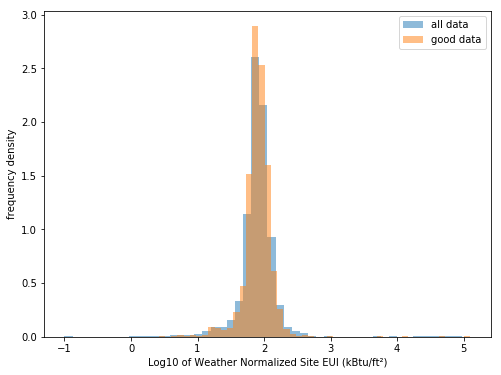

In [48]:
col = 'Weather Normalized Site EUI (kBtu/ft²)'
pl.figure(figsize=(8, 6))
_ = pl.hist(np.log10(df_all[col][df_all[col]>0]), bins=50, density=True, label='all data', alpha=0.5)
_ = pl.hist(np.log10(df_good[col][df_good[col]>0]), bins=50, density=True, label='good data', alpha=0.5)
pl.legend()
pl.xlabel('Log10 of Weather Normalized Site EUI (kBtu/ft²)')
pl.ylabel('frequency density')

Figure 1. 

# 667 and extyra credit
plot a "scatter matrix" of the selected columns. Identify 4 promising "scaling laws" and plot them separately (a scatter plot of column1 vs column2). Does it make sense that there should be a scaling law between the 2 variables? 

which features should be strongly correlated or identical but are not? discuss

([this](https://stackoverflow.com/questions/26975089/making-the-labels-of-the-scatterplot-vertical-and-horizontal-in-pandas) stackoverflow may come in handy)

<Figure size 1440x1152 with 0 Axes>

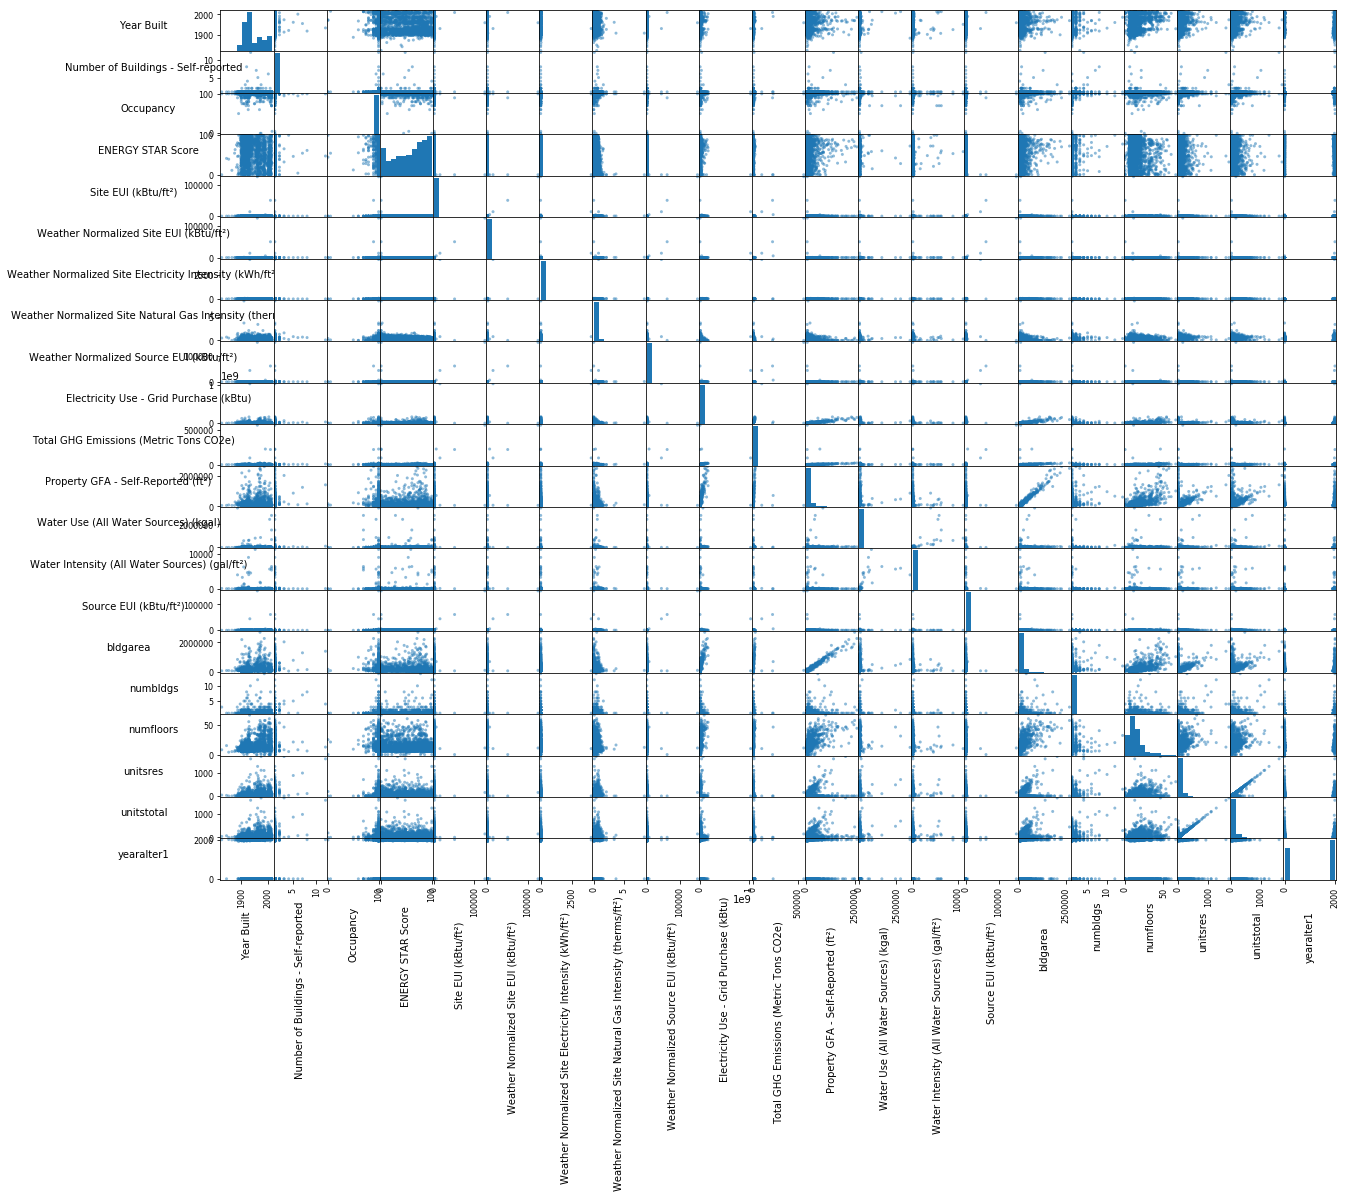

In [144]:
axs = pd.plotting.scatter_matrix(df_good, figsize=(20, 16))
n = len(df_good.columns)
for x in range(n):
    for y in range(n):
        # to get the axis of subplots
        ax = axs[x, y]
        # to make x axis name vertical  
        ax.xaxis.label.set_rotation(90)
        # to make y axis name horizontal 
        ax.yaxis.label.set_rotation(0)
        # to make sure y axis names are outside the plot area
        ax.yaxis.labelpad = 50


Figure 2. The scatter matirx

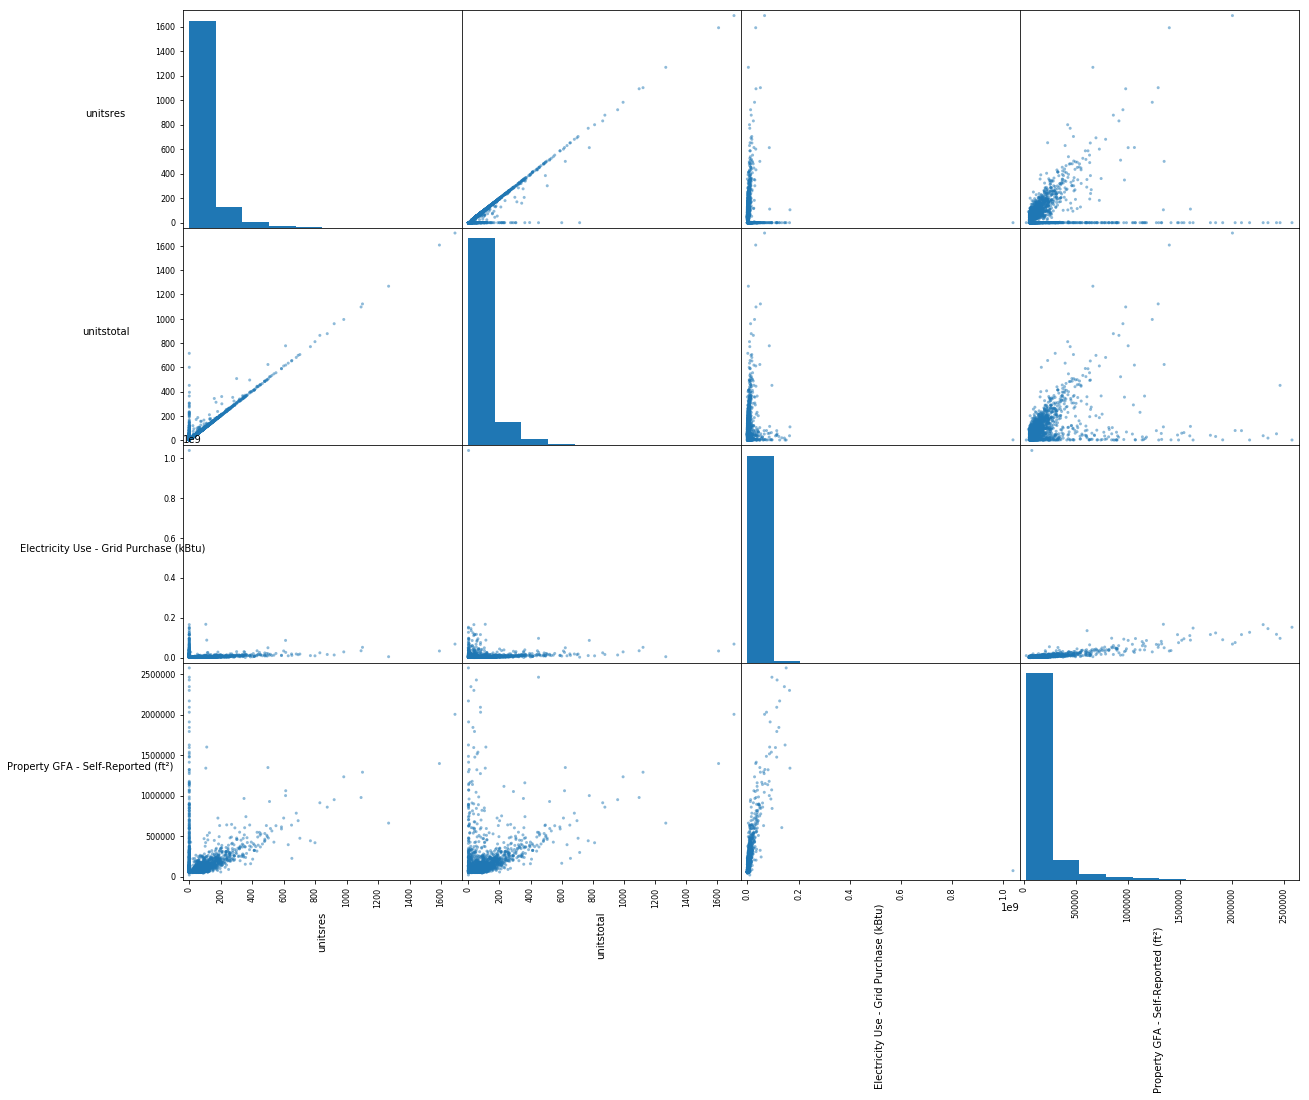

In [20]:
cols = ['unitsres', 'unitstotal', 'Electricity Use - Grid Purchase (kBtu)',
               'Property GFA - Self-Reported (ft²)']
axs = pd.plotting.scatter_matrix(df_good[cols], figsize=(20, 16))
n = len(cols)
for x in range(n):
    for y in range(n):
        # to get the axis of subplots
        ax = axs[x, y]
        # to make x axis name vertical  
        ax.xaxis.label.set_rotation(90)
        # to make y axis name horizontal 
        ax.yaxis.label.set_rotation(0)
        # to make sure y axis names are outside the plot area
        ax.yaxis.labelpad = 50

Figure 3. The scatter matrix 

## all students
At last, from the original dataset remove only the columns that are NaN in the column "Weather Normalized Site EUI (kBtu/ft²)"


In [0]:
# -- drop buildings for which WN Site EUI is NaN
wnec = "Weather Normalized Site EUI (kBtu/ft²)"
df_merged[wnec] = df_merged[wnec].apply(pd.to_numeric, errors='coerce')
df_wnec = df_merged.dropna(subset=[wnec])

In [140]:
df_wnec.shape

(4630, 157)

In [27]:
df_wnec.head()

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),...,assesstot,exemptland,exempttot,yearbuilt,yearalter1,yearalter2,histdist,landmark,builtfar,residfar,commfar,facilfar,borocode,bbl,condono,tract2010,xcoord,ycoord,zonemap,zmcode,sanborn,taxmap,edesignum,appbbl,appdate,mappluto_f,plutomapid,version,sanitdistrict,healthcenterdistrict,firm07_flag,pfirm15_flag,rpaddate,dcasdate,zoningdate,landmkdate,basempdate,masdate,polidate,edesigdate
0,1,13286,201/205,13286,201/205,1.013160e+09,1013160001,1037549,201/205 East 42nd st.,Not Available,10017,675.0,3 AVENUE,Manhattan,289356.0,Office,Office,Office,293447.0,Not Available,Not Available,Not Available,Not Available,1963,2,100,Whole Building,Not Available,Not Available,305.6,303.1,37.8,Not Available,614.2,Not Available,Not Available,Not Available,Not Available,Not Available,5.15506751E7,...,51525450.0,0.0,0.0,1966.0,0.0,0.0,NaN,NaN,15.58,10.00,15.0,15.0,1.0,1.013160e+09,0.0,88.0,991490.0,212893.0,8d,NaN,104 034,10506,NaN,1.013160e+09,5/5/2010,NaN,1.0,18v2.1,6.0,13.0,NaN,NaN,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018
1,2,28400,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1.021380e+09,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,Not Available,10032,180.0,FT WASHINGTON AVENUE,Manhattan,3693539.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),3889181.0,Not Available,Not Available,Not Available,Not Available,1969,12,100,Whole Building,Whole Building,55,229.8,228.8,24.8,2.4,401.1,Not Available,1.96248472E7,Not Available,Not Available,Not Available,-3.914148026E8,...,355877100.0,5849550.0,355877100.0,1930.0,1987.0,1997.0,NaN,NaN,10.14,6.02,0.0,6.5,1.0,1.021380e+09,0.0,251.0,1000399.0,245571.0,3b,NaN,111N091,10802,NaN,0.000000e+00,NaN,NaN,1.0,18v2.1,12.0,17.0,NaN,NaN,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018
2,99,2263463,P&S - Black,3614737,Columbia University Medical Center,1.021380e+09,1021380040,1084989;1810191;1809824;1803801;1084386;1084389,"630, 650 W 168th Street",Not Available,10032,180.0,FT WASHINGTON AVENUE,Manhattan,3693539.0,Office,"Office, Other",Office,498466.0,Other,218212,Not Available,Not Available,1929,1,100,Whole Building,Whole Building,Not Available,430.8,436.5,51.4,0,864.5,Not Available,Not Available,Not Available,Not Available,Not Available,1.790603837E8,...,355877100.0,5849550.0,355877100.0,1930.0,1987.0,1997.0,NaN,NaN,10.14,6.02,0.0,6.5,1.0,1.021380e+09,0.0,251.0,1000399.0,245571.0,3b,NaN,111N091,10802,NaN,0.000000e+00,NaN,NaN,1.0,18v2.1,12.0,17.0,NaN,NaN,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018
6,6,28402,NYP Cornell (East Campus),28402,NYP Cornell (East Campus),1.014800e+09,1-01480-0001,1084781; 1084780,525 East 68th Street,Not Available,10021,1176.0,YORK AVENUE,Manhattan,2230742.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surg

## Analysis: Owner investigation 
### Find owner of the single most energy consuming building

**Find owner of the single most energy consuming building**, as measured by the "Site Weather Normalized EUI per unit area ". 

**Find all the buildings that they own.**


show the weather-normalized site energy consumption and the owner name for the top 30 consuming buildings in Manhattan

In [0]:
# ranking by wnec
df_wnec_ranking = df_wnec.sort_values(by=[wnec], ascending=False)

In [48]:
# find the owner of the most energy consuming building
df_wnec_ranking['ownername'].iloc[0]

'ST MARYS HOME FOR GIR'

In [49]:
# find all the buildings owned by 'ST MARYS HOME FOR GIR'
df_wnec[df_wnec['ownername']==df_wnec_ranking['ownername'].iloc[0]]

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),...,assesstot,exemptland,exempttot,yearbuilt,yearalter1,yearalter2,histdist,landmark,builtfar,residfar,commfar,facilfar,borocode,bbl,condono,tract2010,xcoord,ycoord,zonemap,zmcode,sanborn,taxmap,edesignum,appbbl,appdate,mappluto_f,plutomapid,version,sanitdistrict,healthcenterdistrict,firm07_flag,pfirm15_flag,rpaddate,dcasdate,zoningdate,landmkdate,basempdate,masdate,polidate,edesigdate
3628,4455,2946993,St. Mary's Home for Working Girls,Not Applicable: Standalone Property,Not Applicable: Standalone Property,1.014270e+09,1-01427-0011,1043968,225 East 72nd Street,Not Available,10021,225.0,EAST 72 STREET,Manhattan,95267.0,Residence Hall/Dormitory,Residence Hall/Dormitory,Residence Hall/Dormitory,67655.0,Not Available,Not Available,Not Available,Not Available,1960,1,100,Whole Building,Not Available,1,126307.4,126307.4,7.3,0,152001.3,Not Available,Not Available,Not Available,Not Available,Not Available,8543595494,...,9298350.0,2466000.0,9298350.0,1966.0,0.0,0.0,NaN,NaN,10.25,10.0,0.0,10.0,1.0,1.014270e+09,0.0,126.0,995533.0,219627.0,8c,NaN,108S005,10510,NaN,0.0,NaN,NaN,1.0,18v2.1,8.0,13.0,NaN,NaN,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018


In [47]:
print("Owner of the hisghest consuming building:", df_wnec_ranking['ownername'].iloc[0], '\n',
      "They own {} building(s).".format(df_wnec[df_wnec['ownername']==df_wnec_ranking['ownername'].iloc[0]].shape[0]))

Owner of the hisghest consuming building: ST MARYS HOME FOR GIR 
 They own 1 building(s).


In [53]:
# show top 30 consuming buildings in Manhattan
df_wnec_ranking.iloc[0:30][[wnec, 'ownername']].reset_index()

,index,Weather Normalized Site EUI (kBtu/ft²),ownername
0,3628,126307.4,ST MARYS HOME FOR GIR
1,2997,88701.1,ROLEX RLTY CO INC
2,3116,77493.8,950 THIRD AVENUE LLC
3,2906,57361.3,"58 WEST 58TH UNITS,"
4,2003,54748.3,ANTHONY PAUL GIORGIO
5,2903,51697.6,SOLOVIEFF REALTY CO.
6,2872,50621.4,
7,3106,49620.8,136 E 56TH ST OWNERS
8,2999,32268.7,"MIKEONE EK EAST 53, L"
9,1897,31552.6,THE ABBEY CONDOMINIUM


### Find average building consumption by owner 
For all owners that own more than one building, find the average consumption for buildings owned by the same owner. Your dataframe should have 2 columns called _Weather Normalized Site EUI (kBtu/ft²)_	and _counts_

**Who owns the most energy consuming buildings on average?**

**Who owns the most buildings**

In [0]:
df_wnec_groupby = df_wnec_ranking[[wnec, 'ownername']].groupby(['ownername'])

In [65]:
df_wnec_groupby.mean().head()

,Weather Normalized Site EUI (kBtu/ft²)
ownername,
,195.878099
1 EAST 66TH STREET CO,97.900000
1 LEX AVE CP,51.400000
1 WEST 3RD STREET COR,125.200000
"1-29 BOGARDUS PLACE,",37.600000


In [66]:
df_wnec_groupby.count().head()

,Weather Normalized Site EUI (kBtu/ft²)
ownername,
,484
1 EAST 66TH STREET CO,1
1 LEX AVE CP,1
1 WEST 3RD STREET COR,1
"1-29 BOGARDUS PLACE,",1


In [0]:
df_owner_counts = pd.merge(df_wnec_groupby.count(), df_wnec_groupby.mean(), on='ownername', suffixes=('_count', '_mean'))

In [71]:
# find who owns the most buildings
df_owner_counts.sort_values(by='Weather Normalized Site EUI (kBtu/ft²)_count', ascending=False).head()

,Weather Normalized Site EUI (kBtu/ft²)_count,Weather Normalized Site EUI (kBtu/ft²)_mean
ownername,,
,484,195.878099
TRUSTEES OF COLUMBIA,47,41.263830
NEW YORK UNIVERSITY,44,267.702273
OWNER / AGENT,43,85.558140
ROYAL CHARTER PROPERT,11,50.854545


In [74]:
# find  who owns the most energy consuming buildings on average?
idx = df_owner_counts['Weather Normalized Site EUI (kBtu/ft²)_count'] > 1
df_owner_counts[idx].sort_values(by='Weather Normalized Site EUI (kBtu/ft²)_mean', ascending=False).head()

,Weather Normalized Site EUI (kBtu/ft²)_count,Weather Normalized Site EUI (kBtu/ft²)_mean
ownername,,
COLUMBIA UNIVERSITY,3,1459.233333
373-381 PAS ASSOCIATE,2,684.350000
MOUNT SINAI HOSPITAL,2,382.000000
PRESBYTERIAN HSP CITY,2,332.650000
BETH ISRAEL HOSPITAL,2,330.300000


# 667 and EC

Universities are big realtors in NYC. They may own by different names. Find all builgings owned by NYU and COLUMBIA. replace the ownename with NYU and COLUMBIA respectively and re-aggregate the data based on these names and again find the owner of the buildings that pon average consume the most, of the highest number of buildings, and that owns the most sq footage 

In [0]:
ownername = df_owner_counts.index.to_list()


In [122]:
import difflib
# find ownernames similar to NEW YORK UNIVERSITY
difflib.get_close_matches('NEW YORK UNIVERSITY', ownername, n=10, cutoff=0.5)

['NEW YORK UNIVERSITY',
 'NY UNIVERSITY',
 'NEW SCHOOL UNIVERSITY',
 'PACE UNIVERSITY',
 'FORDHAM UNIVERSITY',
 'CORNELL UNIVERSITY',
 'NEW YORK SOCIETY ETC',
 'NEW YORK COMMUNICATIO',
 'YESHIVA UNIVERSITY',
 'COLUMBIA UNIVERSITY']

In [126]:
difflib.get_close_matches('COLUMBIA', ownername, n=20, cutoff=0.5)

['COLUMBIA SOUTH LLC',
 'COLUM 75 INC',
 'COLUMBIA UNIVERSITY',
 'TRUSTEES OF COLUMBIA',
 'COLUMBIA REIT-218 W.',
 'TRUSTEES COLUMBIA UNI',
 'TRUST COLUMBIA UNIVER',
 'TRST COLUMBIA UNIVERS',
 'TR COLUMBIA UNIVERSIT',
 'DTRUSTEES OF COLUMBIA',
 'COLUMBIA UNVSY CTY NY',
 'COLUMBIA UNIVERSITYIN',
 'COLUMBIA UNIV TR CITY',
 'COLUMBIA UNIV IN NYCT',
 'COLUMBIA UNIV CITY NY',
 'COLUMBIA REIT-245-249',
 'COLUMBIA REIT - 315 P',
 'COLUMBIA REIT - 149 M',
 'COLUMBUS PARK CORP',
 'COLUMBUS MANOR LLC']

In [0]:
# replace to 'NYU' and 'COLUMBIA
columbia = ['COLUMBIA UNIVERSITY', 'TRUSTEES OF COLUMBIA', 
            'TRUSTEES COLUMBIA UNI','TRUST COLUMBIA UNIVER',
            'TRST COLUMBIA UNIVERS','TR COLUMBIA UNIVERSIT',
            'COLUMBIA UNVSY CTY NY', 'COLUMBIA UNIVERSITYIN',
            'COLUMBIA UNIV TR CITY', 'COLUMBIA UNIV IN NYCT',
             'DTRUSTEES OF COLUMBIA', 'COLUMBIA UNIV CITY NY' ]

df_wnec = df_wnec.replace(to_replace=columbia, value='COLUMBIA')

nyu = ['NEW YORK UNIVERSITY', 'NY UNIVERSITY']

df_wnec = df_wnec.replace(to_replace=nyu, value='NYU')

In [158]:
print([col for col in df_wnec.columns])

['Order', 'Property Id', 'Property Name', 'Parent Property Id', 'Parent Property Name', 'BBL - 10 digits', 'NYC Borough, Block and Lot (BBL) self-reported', 'NYC Building Identification Number (BIN)', 'Address 1 (self-reported)', 'Address 2', 'Postal Code', 'Street Number', 'Street Name', 'Borough', 'DOF Gross Floor Area', 'Primary Property Type - Self Selected', 'List of All Property Use Types at Property', 'Largest Property Use Type', 'Largest Property Use Type - Gross Floor Area (ft²)', '2nd Largest Property Use Type', '2nd Largest Property Use - Gross Floor Area (ft²)', '3rd Largest Property Use Type', '3rd Largest Property Use Type - Gross Floor Area (ft²)', 'Year Built', 'Number of Buildings - Self-reported', 'Occupancy', 'Metered Areas (Energy)', 'Metered Areas  (Water)', 'ENERGY STAR Score', 'Site EUI (kBtu/ft²)', 'Weather Normalized Site EUI (kBtu/ft²)', 'Weather Normalized Site Electricity Intensity (kWh/ft²)', 'Weather Normalized Site Natural Gas Intensity (therms/ft²)', 'We

In [0]:
cols = ['ownername', 'Property Name', 'Weather Normalized Site EUI (kBtu/ft²)', 'bldgarea']
df_wnec_good = df_wnec[cols]

In [0]:
df_wnec_groupby = df_wnec_good.groupby(by='ownername')

In [0]:
df_owner_cm = pd.merge(df_wnec_groupby.count(), df_wnec_groupby.mean(), on='ownername', suffixes=('_count', '_mean'))


df_owner_counts = pd.merge(df_owner_cm, df_wnec_groupby.aggregate(np.sum), on='ownername')


In [190]:
df_owner_counts.head()

,Property Name,Weather Normalized Site EUI (kBtu/ft²)_count,bldgarea_count,Weather Normalized Site EUI (kBtu/ft²)_mean,bldgarea_mean,Weather Normalized Site EUI (kBtu/ft²),bldgarea
ownername,,,,,,,
,484,484,484,195.878099,196314.838843,94805.0,95016382.0
1 EAST 66TH STREET CO,1,1,1,97.900000,153525.000000,97.9,153525.0
1 LEX AVE CP,1,1,1,51.400000,75379.000000,51.4,75379.0
1 WEST 3RD STREET COR,1,1,1,125.200000,110949.000000,125.2,110949.0
"1-29 BOGARDUS PLACE,",1,1,1,37.600000,111055.000000,37.6,111055.0


In [175]:
# find who owns the most buildings
df_owner_counts.sort_values(by='Weather Normalized Site EUI (kBtu/ft²)_count', ascending=False).head()

,Property Name,Weather Normalized Site EUI (kBtu/ft²)_count,bldgarea_count,Weather Normalized Site EUI (kBtu/ft²)_mean,bldgarea_mean,Weather Normalized Site EUI (kBtu/ft²),bldgarea
ownername,,,,,,,
,484,484,484,195.878099,196314.838843,94805.0,95016382.0
COLUMBIA,62,62,62,117.869355,236919.516129,7307.9,14689010.0
NYU,45,45,45,263.075556,264164.222222,11838.4,11887390.0
OWNER / AGENT,43,43,43,85.558140,142575.767442,3679.0,6130758.0
ROYAL CHARTER PROPERT,11,11,11,50.854545,92473.363636,559.4,1017207.0


In [194]:
# find  who owns the most energy consuming buildings on average?
idx = df_owner_counts['Weather Normalized Site EUI (kBtu/ft²)_count'] > 1
df_owner_counts[idx].sort_values(by='Weather Normalized Site EUI (kBtu/ft²)_mean', ascending=False).head()

,Property Name,Weather Normalized Site EUI (kBtu/ft²)_count,bldgarea_count,Weather Normalized Site EUI (kBtu/ft²)_mean,bldgarea_mean,Weather Normalized Site EUI (kBtu/ft²),bldgarea
ownername,,,,,,,
373-381 PAS ASSOCIATE,2,2,2,684.350000,149176.0,1368.7,298352.0
MOUNT SINAI HOSPITAL,2,2,2,382.000000,487259.0,764.0,974518.0
PRESBYTERIAN HSP CITY,2,2,2,332.650000,3693539.0,665.3,7387078.0
BETH ISRAEL HOSPITAL,2,2,2,330.300000,201153.5,660.6,402307.0
VERIZON NEW YORK INC,3,3,3,275.366667,0.0,826.1,0.0


In [191]:
# find who owns the most area
df_owner_counts.sort_values(by='bldgarea', ascending=False).head()

,Property Name,Weather Normalized Site EUI (kBtu/ft²)_count,bldgarea_count,Weather Normalized Site EUI (kBtu/ft²)_mean,bldgarea_mean,Weather Normalized Site EUI (kBtu/ft²),bldgarea
ownername,,,,,,,
,484,484,484,195.878099,1.963148e+05,94805.0,95016382.0
COLUMBIA,62,62,62,117.869355,2.369195e+05,7307.9,14689010.0
NYU,45,45,45,263.075556,2.641642e+05,11838.4,11887390.0
BPP ST OWNER LLC,1,1,1,61.800000,8.942176e+06,61.8,8942176.0
PRESBYTERIAN HSP CITY,2,2,2,332.650000,3.693539e+06,665.3,7387078.0


# Summary

In this project, we explore 